# Introduction to Web Scraping

## 1. Introduction to Web Scraping

In today's world, we have tons of unstructured data/information (mostly web data) available freely. Sometimes the freely available data is easy to read and sometimes not. No matter how your data is available, web scraping is a very useful tool to transform unstructured data into structured data that is easier to read and analyze. In other words, web scraping is a way to collect, organize and analyze this enormous amount of data. So let us first understand what is web-scraping.

### When and Where Data Scientists/Analysts Use Web Scraping:

- **When:** When data is not readily available in a structured format (e.g., APIs, databases).
- **Where:** E-commerce, social media, news websites, financial sites, etc.

### Why Use Web Scraping?

- **Data Collection:** Gather large amounts of data from the web quickly and efficiently.
- **Automation:** Automate the process of data collection and updates.
- **Insights:** Derive insights from data that is not easily accessible through other means.

### Ethical and Legal Considerations:

- **Ethics:** Respecting website terms of service, avoiding overloading servers.
- **Legality:** Following the robots.txt file, understanding copyright laws.

### Common Web Scraping Tools:

- **Libraries:** Beautiful Soup, Scrapy, Selenium, Requests.
- **Comparison:** Use cases for each tool

### Content:

#### Basics of HTML:

- **HTML Tags:** `<html>`, `<head>`, `<body>`, `<div>`, `<span>`, etc.
- **Attributes:** `id`, `class`, `href`, `src`, etc.
- **DOM Structure:** The hierarchical organization of elements.

#### Common HTML Tags and Their Uses:

- **Headings:** `<h1>`, `<h2>`, `<h3>`, etc.
- **Paragraphs:** `<p>`
- **Links:** `<a href="URL">Link Text</a>`
- **Images:** `<img src="image.jpg" alt="description">`
- **Lists:** `<ul>`, `<ol>`, `<li>`
- **Tables:** `<table>`, `<tr>`, `<td>`


## Fetching Web Pages with Requests

#### Introduction to the requests Library:

* **Requests:** Sending HTTP requests to fetch web content.
      
      --> pip install requests

#### Sending GET Requests and Handling Responses:

```python
import requests
url = "http://google.com"
response = requests.get(url)


### Handling HTTP Responses:

#### Status Codes:
 
    200: OK
    300: Redirection
    400: Client Error (e.g., 404 Not Found)
    500: Server Error (e.g., 500 Internal Server Error)

## Parsing HTML with Beautiful Soup

### Learning Objectives:

- Parse HTML documents using Beautiful Soup.
- Extract specific elements and data from web pages.

### Introduction to Beautiful Soup

Beautiful Soup is a Python library named after a Lewis Carroll poem of the same name in "Alice's Adventures in Wonderland". Beautiful Soup parses unwanted data and helps organize and format messy web data by fixing bad HTML and presenting it in easily-traversable XML structures. In short, Beautiful Soup is a Python package that allows us to pull data out of HTML and XML documents.

### Installing Beautiful Soup:

```bash
pip install beautifulsoup4
```


### Commonly Used Methods and Attributes:

    soup.title: The <title> tag of the HTML document.
    soup.body: The <body> tag of the HTML document.
    soup.find(): Finds the first instance of an element.
    soup.find_all(): Finds all instances of an element.

## Importing all required libraries

In [210]:
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [211]:
url = "https://traveltriangle.com/tour-packages/?date=&travelmonth=&destination_not_decided=&days[]=4-6&adult=&children="

In [212]:
res = requests.get(url)
res

<Response [200]>

### We got response [200] 

In [214]:
soup = BeautifulSoup(res.content, "html.parser")

### Extracting `title` from website

In [216]:
title = soup.find_all("span",class_="fw9 m0 f16 pfc3")
print(title)

[<span class="fw9 m0 f16 pfc3">Maldives South Palm Resort Package With Flights</span>, <span class="fw9 m0 f16 pfc3">Idyllic Maldives Honeymoon Tour Package</span>, <span class="fw9 m0 f16 pfc3">Budget-Friendly Dubai Packages From Atlantis For A Thrilling Vacay</span>, <span class="fw9 m0 f16 pfc3">Most Reasonable Goa Honeymoon Tour Packages</span>, <span class="fw9 m0 f16 pfc3">Fantastic Andaman Honeymoon Package</span>, <span class="fw9 m0 f16 pfc3">Refreshing Maldives Family Tour Packages From India</span>, <span class="fw9 m0 f16 pfc3">Best 4N 5D Andaman Sightseeing Tour Package For A Refreshing Getaway</span>, <span class="fw9 m0 f16 pfc3">Astounding Dubai Honeymoon Package</span>, <span class="fw9 m0 f16 pfc3">Hills &amp; Houseboat: Munnar and Alleppey Honeymoon Package </span>, <span class="fw9 m0 f16 pfc3">Top Family Holiday Packages in Goa for an Ideal Family Vacation</span>, <span class="fw9 m0 f16 pfc3">Top 4 Nights 5 Days Best-Selling Sikkim Gangtok Darjeeling Tour Package<

In [217]:
titles = []
for t in title:
    titles.append(t.get_text().strip())

In [218]:
print(titles)

['Maldives South Palm Resort Package With Flights', 'Idyllic Maldives Honeymoon Tour Package', 'Budget-Friendly Dubai Packages From Atlantis For A Thrilling Vacay', 'Most Reasonable Goa Honeymoon Tour Packages', 'Fantastic Andaman Honeymoon Package', 'Refreshing Maldives Family Tour Packages From India', 'Best 4N 5D Andaman Sightseeing Tour Package For A Refreshing Getaway', 'Astounding Dubai Honeymoon Package', 'Hills & Houseboat: Munnar and Alleppey Honeymoon Package', 'Top Family Holiday Packages in Goa for an Ideal Family Vacation', 'Top 4 Nights 5 Days Best-Selling Sikkim Gangtok Darjeeling Tour Package', 'Best 5 Night 6 Day Leh Ladakh Tour Package For A Fun Filled Vacay', 'Memorable Mauritius Tour Package', 'Charming Paris Honeymoon Package', 'Postcard-Perfect Sikkim Gangtok Lachung Honeymoon Packages', 'Best Maldives Sightseeing Tour Package With Fun-Filled Experiences', 'Best Selling Kerala Houseboat & Jungle Safari Tour Package', 'Superb Bali Tour Package', 'Explore The Romant

### Extracting `Duration` from website

In [220]:
duration = soup.find_all("span" ,class_="iblock sfc6")
print(duration)

[<span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">6<!-- --> Days &amp; <!-- -->5<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">6<!-- --> Days &amp; <!-- -->5<!-- --> Nights</span>, <span class="iblock sfc6">6<!-- --> Days &amp; <!-- -->5<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Days &amp; <!-- -->4<!-- --> Nights</span>, <span class="iblock sfc6">6<!-- --> Days &amp; <!-- -->5<!-- --> Nights</span>, <span class="iblock sfc6">5<!-- --> Day

In [221]:
durations = []
for d in duration:
    durations.append(d.get_text().strip())

In [222]:
print(durations)

['5 Days & 4 Nights', '5 Days & 4 Nights', '6 Days & 5 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '6 Days & 5 Nights', '6 Days & 5 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '6 Days & 5 Nights', '5 Days & 4 Nights', '4 Days & 3 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '5 Days & 4 Nights', '6 Days & 5 Nights', '5 Days & 4 Nights', '6 Days & 5 Nights']


### Extracting `Price` from website

In [224]:
price = soup.find_all("p" ,class_="sfc3 m0 f20 fw9 priceVal at_newprice")
print(price)

[<p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 93,000/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 141,515/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 7,999/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 9,142/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 15,599/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 18,811/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 37,500/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 85,714/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 33,200/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 36,484/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" itemprop="priceSpecification">₹ 71,000/-<span class="f12 pfc3 tdl ml8 at_oldprice fw4">₹ 78,022/-</span></p>, <p class="sfc3 m0 f20 fw9 priceVal at_newprice" item

In [225]:
prices = []
for p in price:
    prices.append(p.get_text().strip())

In [226]:
print(prices)

['₹ 93,000/-₹ 141,515/-', '₹ 7,999/-₹ 9,142/-', '₹ 15,599/-₹ 18,811/-', '₹ 37,500/-₹ 85,714/-', '₹ 33,200/-₹ 36,484/-', '₹ 71,000/-₹ 78,022/-', '₹ 22,000/-₹ 24,444/-', '₹ 9,999/-₹ 10,868/-', '₹ 22,000/-₹ 26,258/-', '₹ 21,999/-₹ 28,110/-', '₹ 40,500/-₹ 44,505/-', '₹ 42,900/-₹ 47,667/-', '₹ 22,000/-₹ 24,000/-', '₹ 50,000/-₹ 54,945/-', '₹ 20,048/-₹ 24,604/-', '₹ 19,990/-₹ 29,990/-', '₹ 18,079/-₹ 20,088/-', '₹ 24,499/-₹ 28,160/-']


### Extracting ` Discount` from website

In [228]:
dis = soup.find_all("span" ,class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label")
print(dis)

[<span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">23<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">34<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">15<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">13<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">17<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">56<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">9<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">9<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">10<!-- -->% Off</span>, <span class="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label">8<!-- -->% Off</span>, <span class=

In [229]:
discount = []
for d in dis:
    discount.append(d.get_text().strip())

In [230]:
print(discount)

['23% Off', '34% Off', '15% Off', '13% Off', '17% Off', '56% Off', '9% Off', '9% Off', '10% Off', '8% Off', '16% Off', '22% Off', '9% Off', '10% Off', '8% Off', '9% Off', '19% Off', '33% Off', '10% Off', '13% Off']


### Extracting `Hotel_Star`  from website 

In [232]:
hotel = soup.find_all("div" ,class_="col-12 p8 flex absolute t142 wfull")
print(hotel)

[<div class="col-12 p8 flex absolute t142 wfull"><div class="overflowh"><div class="row row-"><ul class="package-incexc-list at_packageincexc-list"><li class="icon-box relative"><span class="icon-box"></span><p class="mb0">Upto 5 Stars</p></li><li class="icon-box relative"><span class="icon-box"></span><p class="mb0">Meals</p></li><li class="not-included relative"><span class="icon-box"></span><p class="mb0">Sightseeing</p></li></ul></div></div><div class="tooltipCommon flex cursorP text-center sfc1 f12 alignCenter justifyCenter _2DEdEQx">+<!-- -->2<!-- --> more<div class="_1IDFBSq tooltipBox z3 sbcw"><div class="m0 p0 pfc3 text-left"><span class="ellipsis f12 pt3 pb3 block _1jgRrdA">Stay Included</span><span class="ellipsis f12 pt3 pb3 block _1jgRrdA">Transfers</span></div><span class="_1gJcJhF tooltipArrow 1"></span></div></div></div>, <div class="col-12 p8 flex absolute t142 wfull"><div class="overflowh"><div class="row row-"><ul class="package-incexc-list at_packageincexc-list"><li

In [233]:
hotel_type = []
for ht in hotel:
    hotel_type.append(ht.get_text().strip())

In [234]:
print(hotel_type)

['Upto 5 StarsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 2 StarsMealsSightseeing+2 moreAirport Pickup-DropPrivate Cab', 'Upto 3 StarsMealsSightseeing+2 moreTransfersWatersports', 'Upto 4 StarsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 3 StarsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 4 StarsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 3 StarsMealsSightseeing+2 moreTransfersHoneymoon freebies', 'Upto 3 StarsMealsSightseeing+2 morePrivate CabAirport Pickup-Drop', 'Upto 3 StarsMealsSightseeing+2 moreAirport Pickup-DropPrivate Cab', 'Upto 3 StarsMealsSightseeing+3 moreAirport TransferPrivate CabCamp Stay', 'HotelsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 4 StarsMealsSightseeing+2 moreStay IncludedTransfers', 'Upto 3 StarsMealsSightseeing+3 moreAirport Pickup-DropPrivate CabFloral Decoration', 'Upto 3 StarsMealsSightseeing+2 moreTransfersStay Included', 'Upto 4 StarsMealsSightseeing+4 moreHouseboatSafariAirport Pickup-DropPrivate Cab', '

### Extracting ` City` form website 

In [236]:
cit = soup.find_all("ul" ,class_="clearfix package-cities-list at_packagecity_list")
print(cit)

[<ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Addu City<!-- --> (5D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Maldives<!-- --> (5D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Dubai<!-- --> (6D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Goa<!-- --> (5D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Port Blair<!-- --> (3D)</li><li class="f12">Havelock<!-- --> (2D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Maldives<!-- --> (5D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Port Blair<!-- --> (4D)</li><li class="f12">Havelock<!-- --> (1D)</li></ul>, <ul class="clearfix package-cities-list at_packagecity_list"><li class="f12">Dubai<!-- --> (6D)</li></ul>, <ul class="clearfix package-cities-list a

In [237]:
ci =[]
for c in cit:
    ci.append(c.get_text().strip())

In [238]:
print(ci)

['Addu City (5D)', 'Maldives (5D)', 'Dubai (6D)', 'Goa (5D)', 'Port Blair (3D)Havelock (2D)', 'Maldives (5D)', 'Port Blair (4D)Havelock (1D)', 'Dubai (6D)', 'Munnar (2D)Thekkady (1D)Alleppey (1D)Kochi (2D)', 'Calangute (5D)', 'Gangtok (2D)Darjeeling (3D)', 'Leh (5D)Nubra Valley (1D)', 'Mauritius (5D)', 'Paris (4D)', 'Gangtok (4D)Lachung (1D)', 'Maldives (5D)', 'Munnar (2D)Thekkady (1D)Alleppey (2D)', 'Kuta (3D)Nusa Dua (3D)', 'Phuntsholing (1D)Paro (2D)Thimphu (2D)', 'Kaziranga (2D)Shillong (2D)Guwahati (2D)']


## Using `While loop` scraping the Data upto 51 pages  

In [240]:
import requests

title = []
days_nights = []
price = []
discount = []
hotel_type = []
location = []

page = 1

while page <= 51:
    url = f"https://traveltriangle.com/tour-packages/page/{page}?"
    res = requests.get(url)

    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(res.content, "html.parser")
    
    titles = soup.find_all("span",class_="fw9 m0 f16 pfc3")
    duration = soup.find_all("span" ,class_="iblock sfc6")
    prices = soup.find_all("p" ,class_="sfc3 m0 f20 fw9 priceVal at_newprice")
    dis = soup.find_all("span" ,class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label")
    hotel = soup.find_all("div" ,class_="col-12 p8 flex absolute t142 wfull")
    cit = soup.find_all("ul" ,class_="clearfix package-cities-list at_packagecity_list")
    
    for t, du, p, di, h, l in zip(titles, duration,prices, dis, hotel, cit):
        title.append(t.get_text().strip())
        days_nights.append(du.get_text().strip())
        price.append(p.get_text().strip())
        discount.append(di.get_text().strip())
        hotel_type.append(h.get_text().strip())
        location.append(l.get_text().strip())

    page = page + 1 

## Converting into DataFrame 

In [242]:
df = pd.DataFrame({"Title":title,
                  "Duration":days_nights,
                  "Price":price,
                  "Discount":discount,
                  "Hotel":hotel_type,
                  "Location":location
                  })

In [243]:
df

,Title,Duration,Price,Discount,Hotel,Location
0,Maldives South Palm Resort Package With Flights,5 Days & 4 Nights,"₹ 29,000/-₹ 32,222/-",23% Off,Upto 4 StarsMealsSightseeing+3 moreEntry fee c...,Addu City (5D)
1,Exclusive Bali Honeymoon Tour Packages For A M...,7 Days & 6 Nights,"₹ 10,500/-₹ 12,000/-",10% Off,Upto 3 StarsMealsSightseeing+1 moreTransfers,Kuta (4D)Ubud (3D)
2,Romantic Mussoorie Tour Package From Delhi,3 Days & 2 Nights,"₹ 93,000/-₹ 141,515/-",13% Off,Upto 5 StarsMealsSightseeing+2 moreStay Includ...,Mussoorie (3D)
3,Idyllic Maldives Honeymoon Tour Package,5 Days & 4 Nights,"₹ 7,999/-₹ 9,142/-",34% Off,Upto 2 StarsMealsSightseeing+2 moreAirport Pic...,Maldives (5D)
4,Budget-Friendly Dubai Packages From Atlantis F...,6 Days & 5 Nights,"₹ 15,599/-₹ 18,811/-",15% Off,Upto 3 StarsMealsSightseeing+2 moreTransfersWa...,Dubai (6D)
...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,4 Days & 3 Nights,"₹ 33,999/-₹ 37,362/-",9% Off,Upto 4 StarsMealsSightseeing+2 moreStay Includ...,Pattaya (4D)
966,Idyllic Dharamshala Family Package,6 Days & 5 Nights,"₹ 23,400/-₹ 25,714/-",9% Off,Upto 3 StarsMealsSightseeing+2 moreStay Includ...,Dharamshala (1D)Dalhousie (2D)Amritsar (3D)
967,Adventurous Assam Tour Package,3 Days & 2 Nights,"₹ 14,000/-₹ 15,730/-",11% Off,Upto 3 StarsMealsSightseeing+4 moreJeep Safari...,Kaziranga National Park (3D)
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",13 Days & 12 Nights,"₹ 142,000/-₹ 150,081/-",5% Off,Upto 3 StarsMealsSightseeing+2 moreAirport Pic...,Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...


In [244]:
df = df[['Title', 'Location', 'Duration', 'Price', 'Discount', 'Hotel']]
df

,Title,Location,Duration,Price,Discount,Hotel
0,Maldives South Palm Resort Package With Flights,Addu City (5D),5 Days & 4 Nights,"₹ 29,000/-₹ 32,222/-",23% Off,Upto 4 StarsMealsSightseeing+3 moreEntry fee c...
1,Exclusive Bali Honeymoon Tour Packages For A M...,Kuta (4D)Ubud (3D),7 Days & 6 Nights,"₹ 10,500/-₹ 12,000/-",10% Off,Upto 3 StarsMealsSightseeing+1 moreTransfers
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie (3D),3 Days & 2 Nights,"₹ 93,000/-₹ 141,515/-",13% Off,Upto 5 StarsMealsSightseeing+2 moreStay Includ...
3,Idyllic Maldives Honeymoon Tour Package,Maldives (5D),5 Days & 4 Nights,"₹ 7,999/-₹ 9,142/-",34% Off,Upto 2 StarsMealsSightseeing+2 moreAirport Pic...
4,Budget-Friendly Dubai Packages From Atlantis F...,Dubai (6D),6 Days & 5 Nights,"₹ 15,599/-₹ 18,811/-",15% Off,Upto 3 StarsMealsSightseeing+2 moreTransfersWa...
...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,Pattaya (4D),4 Days & 3 Nights,"₹ 33,999/-₹ 37,362/-",9% Off,Upto 4 StarsMealsSightseeing+2 moreStay Includ...
966,Idyllic Dharamshala Family Package,Dharamshala (1D)Dalhousie (2D)Amritsar (3D),6 Days & 5 Nights,"₹ 23,400/-₹ 25,714/-",9% Off,Upto 3 StarsMealsSightseeing+2 moreStay Includ...
967,Adventurous Assam Tour Package,Kaziranga National Park (3D),3 Days & 2 Nights,"₹ 14,000/-₹ 15,730/-",11% Off,Upto 3 StarsMealsSightseeing+4 moreJeep Safari...
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...,13 Days & 12 Nights,"₹ 142,000/-₹ 150,081/-",5% Off,Upto 3 StarsMealsSightseeing+2 moreAirport Pic...


In [245]:
df

,Title,Location,Duration,Price,Discount,Hotel
0,Maldives South Palm Resort Package With Flights,Addu City (5D),5 Days & 4 Nights,"₹ 29,000/-₹ 32,222/-",23% Off,Upto 4 StarsMealsSightseeing+3 moreEntry fee c...
1,Exclusive Bali Honeymoon Tour Packages For A M...,Kuta (4D)Ubud (3D),7 Days & 6 Nights,"₹ 10,500/-₹ 12,000/-",10% Off,Upto 3 StarsMealsSightseeing+1 moreTransfers
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie (3D),3 Days & 2 Nights,"₹ 93,000/-₹ 141,515/-",13% Off,Upto 5 StarsMealsSightseeing+2 moreStay Includ...
3,Idyllic Maldives Honeymoon Tour Package,Maldives (5D),5 Days & 4 Nights,"₹ 7,999/-₹ 9,142/-",34% Off,Upto 2 StarsMealsSightseeing+2 moreAirport Pic...
4,Budget-Friendly Dubai Packages From Atlantis F...,Dubai (6D),6 Days & 5 Nights,"₹ 15,599/-₹ 18,811/-",15% Off,Upto 3 StarsMealsSightseeing+2 moreTransfersWa...
...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,Pattaya (4D),4 Days & 3 Nights,"₹ 33,999/-₹ 37,362/-",9% Off,Upto 4 StarsMealsSightseeing+2 moreStay Includ...
966,Idyllic Dharamshala Family Package,Dharamshala (1D)Dalhousie (2D)Amritsar (3D),6 Days & 5 Nights,"₹ 23,400/-₹ 25,714/-",9% Off,Upto 3 StarsMealsSightseeing+2 moreStay Includ...
967,Adventurous Assam Tour Package,Kaziranga National Park (3D),3 Days & 2 Nights,"₹ 14,000/-₹ 15,730/-",11% Off,Upto 3 StarsMealsSightseeing+4 moreJeep Safari...
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...,13 Days & 12 Nights,"₹ 142,000/-₹ 150,081/-",5% Off,Upto 3 StarsMealsSightseeing+2 moreAirport Pic...


In [246]:
df.shape

(970, 6)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     970 non-null    object
 1   Location  970 non-null    object
 2   Duration  970 non-null    object
 3   Price     970 non-null    object
 4   Discount  970 non-null    object
 5   Hotel     970 non-null    object
dtypes: object(6)
memory usage: 45.6+ KB


## Extracting the Columns

In [249]:
## a) Clean Duration -> split into Days and Nights
df['Days'] = df['Duration'].str.extract(r'(\d+)\s*Days').astype(int)
df['Nights'] = df['Duration'].str.extract(r'(\d+)\s*Nights').astype(int)


# b) Clean Price -> split into Min & Max
df['Price'] = df['Price'].str.replace(r'[₹,/-]', '', regex=True)   # remove ₹ , / -
df[['Price_Min','Price_Max']] = df['Price'].str.split(expand=True).iloc[:,:2]
df['Price_Min'] = pd.to_numeric(df['Price_Min'], errors='coerce')
df['Price_Max'] = pd.to_numeric(df['Price_Max'], errors='coerce')


## c) Clean Discount -> remove 'Off'
df['Discount'] = df['Discount'].str.replace('% Off','').astype(int)


## d) Create Avg Price
df['Avg_Price'] = (df['Price_Min'] + df['Price_Max']) / 2



In [250]:
# d) Extract Hotel Stars
df['Hotel_Stars'] = df['Hotel'].str.extract(r'(\d+)\s*Stars')



# e) Extract Sightseeing Count (from '+N more')
df['Included'] = df['Hotel'].str.extract(r'(Sightseeing\+\d+\s*more)')

In [251]:
df.drop(['Price', 'Duration', 'Hotel'], axis= 1, inplace = True)

In [252]:
df = df[['Title', 'Location', 'Days', 'Nights', 'Price_Min', 'Price_Max', 'Avg_Price', 'Discount', 'Hotel_Stars', 'Included']]

# EDA 

In [254]:
df

,Title,Location,Days,Nights,Price_Min,Price_Max,Avg_Price,Discount,Hotel_Stars,Included
0,Maldives South Palm Resort Package With Flights,Addu City (5D),5,4,29000,32222,30611.0,23,4,Sightseeing+3 more
1,Exclusive Bali Honeymoon Tour Packages For A M...,Kuta (4D)Ubud (3D),7,6,10500,12000,11250.0,10,3,Sightseeing+1 more
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie (3D),3,2,93000,141515,117257.5,13,5,Sightseeing+2 more
3,Idyllic Maldives Honeymoon Tour Package,Maldives (5D),5,4,7999,9142,8570.5,34,2,Sightseeing+2 more
4,Budget-Friendly Dubai Packages From Atlantis F...,Dubai (6D),6,5,15599,18811,17205.0,15,3,Sightseeing+2 more
...,...,...,...,...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,Pattaya (4D),4,3,33999,37362,35680.5,9,4,Sightseeing+2 more
966,Idyllic Dharamshala Family Package,Dharamshala (1D)Dalhousie (2D)Amritsar (3D),6,5,23400,25714,24557.0,9,3,Sightseeing+2 more
967,Adventurous Assam Tour Package,Kaziranga National Park (3D),3,2,14000,15730,14865.0,11,3,Sightseeing+4 more
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...,13,12,142000,150081,146040.5,5,3,Sightseeing+2 more


In [255]:
df.shape

(970, 10)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        970 non-null    object 
 1   Location     970 non-null    object 
 2   Days         970 non-null    int32  
 3   Nights       970 non-null    int32  
 4   Price_Min    970 non-null    int64  
 5   Price_Max    970 non-null    int64  
 6   Avg_Price    970 non-null    float64
 7   Discount     970 non-null    int32  
 8   Hotel_Stars  968 non-null    object 
 9   Included     970 non-null    object 
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 64.5+ KB


## Checking the Null_values

In [258]:
df.isnull().sum()

Title          0
Location       0
Days           0
Nights         0
Price_Min      0
Price_Max      0
Avg_Price      0
Discount       0
Hotel_Stars    2
Included       0
dtype: int64

In [259]:
df['Hotel_Stars'].fillna(2, inplace = True)

In [260]:
df['Hotel_Stars'] = pd.to_numeric(df['Hotel_Stars'], errors = 'coerce').astype(int)

### Observation 

- Filled the NULL_values with 2 in Hotel_Stars column..
- Converted to Integer datatype..

## Checking the Dtypes

In [263]:
df.dtypes

Title           object
Location        object
Days             int32
Nights           int32
Price_Min        int64
Price_Max        int64
Avg_Price      float64
Discount         int32
Hotel_Stars      int32
Included        object
dtype: object

##  Checking the duplicates

In [265]:
df.duplicated().sum()

0

In [266]:
df.drop_duplicates(inplace=True)

###  Optional: Drop rows with critical missing information (e.g. missing Title or Location)

In [268]:
df.dropna(subset=['Title', 'Location'], inplace=True)

In [269]:
df

,Title,Location,Days,Nights,Price_Min,Price_Max,Avg_Price,Discount,Hotel_Stars,Included
0,Maldives South Palm Resort Package With Flights,Addu City (5D),5,4,29000,32222,30611.0,23,4,Sightseeing+3 more
1,Exclusive Bali Honeymoon Tour Packages For A M...,Kuta (4D)Ubud (3D),7,6,10500,12000,11250.0,10,3,Sightseeing+1 more
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie (3D),3,2,93000,141515,117257.5,13,5,Sightseeing+2 more
3,Idyllic Maldives Honeymoon Tour Package,Maldives (5D),5,4,7999,9142,8570.5,34,2,Sightseeing+2 more
4,Budget-Friendly Dubai Packages From Atlantis F...,Dubai (6D),6,5,15599,18811,17205.0,15,3,Sightseeing+2 more
...,...,...,...,...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,Pattaya (4D),4,3,33999,37362,35680.5,9,4,Sightseeing+2 more
966,Idyllic Dharamshala Family Package,Dharamshala (1D)Dalhousie (2D)Amritsar (3D),6,5,23400,25714,24557.0,9,3,Sightseeing+2 more
967,Adventurous Assam Tour Package,Kaziranga National Park (3D),3,2,14000,15730,14865.0,11,3,Sightseeing+4 more
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...,13,12,142000,150081,146040.5,5,3,Sightseeing+2 more


## Outlier Detection

In [271]:
numerical_cols = df.select_dtypes(include=['int64', 'int32','float64']).columns

In [272]:
outliers = {}

for col in numerical_cols:
    if df[col].isnull().all():
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
    print("No outliers found in the numerical columns.")


Outliers in column 'Days':
[12, 12, 16, 12, 14, 15, 12, 13, 16, 12, 14, 15, 15, 20, 12, 12, 12, 18, 14, 20, 12, 13, 13]

Outliers in column 'Nights':
[11, 11, 15, 11, 13, 14, 11, 12, 15, 11, 13, 14, 14, 19, 11, 11, 11, 17, 13, 19, 11, 12, 12]

Outliers in column 'Price_Min':
[124000, 142000, 106000, 141750, 152500, 130550, 109899, 127500, 152000, 115000, 178500, 125000, 117299, 190900, 128000, 105289, 125000, 115000, 189479, 185600, 130000, 107000, 128500, 105281, 136450, 168000, 161288, 209750, 164927, 195599, 106310, 110000, 104999, 117386, 107098, 178750, 210000, 139000, 127000, 107098, 259585, 160000, 136500, 105289, 115500, 142999, 124500, 156800, 115500, 136499, 143240, 115500, 148891, 163750, 131249, 136499, 250000, 217000, 150000, 169000, 128399, 158000, 138600, 108000, 122386, 120000, 126000, 162750, 132800, 142000]

Outliers in column 'Price_Max':
[141515, 133418, 150606, 120454, 155769, 163978, 141902, 120768, 140110, 168889, 180000, 194022, 123596, 170000, 131797, 209780, 

### Observation 

- There are so many Outliers found in all numerical columns.

## Capping the Outliers

In [275]:
num_cols = ['Days','Nights','Price_Min','Price_Max','Avg_Price','Discount']

In [276]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers for all numeric columns
for col in num_cols:
    df = cap_outliers(df, col)

### Observation

- Instead of removing extreme values, we limit (cap) them at a certain threshold so they don’t distort the analysis.

### Checking After the Capping Outliers

In [279]:
outliers = {}

for col in numerical_cols:
    if df[col].isnull().all():
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
    print("No outliers found in the numerical columns.")


Outliers in column 'Hotel_Stars':
[1]


In [280]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [281]:
df = remove_outliers(df, 'Discount')

In [282]:
df

,Title,Location,Days,Nights,Price_Min,Price_Max,Avg_Price,Discount,Hotel_Stars,Included
0,Maldives South Palm Resort Package With Flights,Addu City (5D),5.0,4.0,29000,32222.000,30611.0000,11.5,4,Sightseeing+3 more
1,Exclusive Bali Honeymoon Tour Packages For A M...,Kuta (4D)Ubud (3D),7.0,6.0,10500,12000.000,11250.0000,10.0,3,Sightseeing+1 more
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie (3D),3.0,2.0,93000,111991.875,107735.6875,11.5,5,Sightseeing+2 more
3,Idyllic Maldives Honeymoon Tour Package,Maldives (5D),5.0,4.0,7999,9142.000,8570.5000,11.5,2,Sightseeing+2 more
4,Budget-Friendly Dubai Packages From Atlantis F...,Dubai (6D),6.0,5.0,15599,18811.000,17205.0000,11.5,3,Sightseeing+2 more
...,...,...,...,...,...,...,...,...,...,...
965,Sizzling Pattaya Sightseeing Tour Package,Pattaya (4D),4.0,3.0,33999,37362.000,35680.5000,9.0,4,Sightseeing+2 more
966,Idyllic Dharamshala Family Package,Dharamshala (1D)Dalhousie (2D)Amritsar (3D),6.0,5.0,23400,25714.000,24557.0000,9.0,3,Sightseeing+2 more
967,Adventurous Assam Tour Package,Kaziranga National Park (3D),3.0,2.0,14000,15730.000,14865.0000,11.0,3,Sightseeing+4 more
968,"New Zealand Queenstown, Rotorua & Franz Josef ...",Auckland (2D)Paihia (2D)Rotorua (1D)Queenstown...,11.5,10.5,102125,111991.875,107735.6875,7.5,3,Sightseeing+2 more


## Statistical summary of Numerical columns

In [284]:
df.describe()

,Days,Nights,Price_Min,Price_Max,Avg_Price,Discount,Hotel_Stars
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,5.479897,4.479897,36868.668041,40899.913402,38961.360503,9.431443,3.221649
std,2.271636,2.271636,28621.112334,31563.401662,30244.381977,1.271336,0.713532
min,2.000000,1.000000,2500.000000,2750.000000,2625.000000,7.500000,1.000000
25%,4.000000,3.000000,15250.000000,16958.750000,16017.250000,9.000000,3.000000
50%,5.000000,4.000000,26250.000000,29401.000000,27864.000000,9.000000,3.000000
75%,7.000000,6.000000,50000.000000,54972.000000,52704.625000,10.000000,4.000000
max,11.500000,10.500000,102125.000000,111991.875000,107735.687500,11.500000,5.000000


### Observation 

- Describes the Statistical summary of Numerical columns ..

## Value_counts for Categorical columns


In [287]:
df['Title'].value_counts()

Title
Maldives South Palm Resort Package With Flights                       1
Luxurious Palm Atlantis Dubai Holiday Package                         1
Austria Honeymoon: An Enchanting Experience                           1
Riveting Rajasthan Sightseeing Tour Package                           1
Kerala Honeymoon Package For 2 Nights 3 Days                          1
                                                                     ..
Exciting Vietnam Honeymoon Tour                                       1
An Utterly Ravishing Rajasthan Tour Package                           1
Best Selling Meghalaya Tour Packages For A Rejuvenating Experience    1
Mesmerizing Uttarakhand Summer Special Family Package                 1
Ecstatic Cambodia Vietnam Family Holiday Package                      1
Name: count, Length: 970, dtype: int64

In [288]:
df['Location'].value_counts()

Location
Mauritius (7D)                                                      15
Goa (4D)                                                            11
Dubai (5D)                                                           9
Mauritius (6D)                                                       8
Maldives (5D)                                                        8
                                                                    ..
Vaikom (1D)Alleppey (1D)Thekkady (2D)Athirapally (1D)Cherai (3D)     1
Praslin (3D)Mahe Island (3D)Mahe (1D)                                1
Colombo (2D)Maldives (4D)                                            1
Phuket (3D)Krabi (3D)                                                1
Hanoi (3D)Ho Chi Minh City (3D)Siem Reap (2D)Phnom Penh (3D)         1
Name: count, Length: 589, dtype: int64

In [289]:
df['Included'].value_counts()

Included
Sightseeing+2 more    678
Sightseeing+1 more    135
Sightseeing+3 more     97
Sightseeing+4 more     38
Sightseeing+5 more     18
Sightseeing+6 more      4
Name: count, dtype: int64

## Univariate Non Visual Analysis (categorical data)

In [291]:
def discrete(discrete_data):
    for col_name in discrete_data:
        print("*"*10,col_name,"*"*10)
        print(discrete_data[col_name].agg(['count','nunique','unique']))
        print()

In [292]:
discrete_df = df.select_dtypes(include=['object'])

In [293]:
discrete(discrete_df)

********** Title **********
count                                                    970
nunique                                                  970
unique     [Maldives South Palm Resort Package With Fligh...
Name: Title, dtype: object

********** Location **********
count                                                    970
nunique                                                  589
unique     [Addu City (5D), Kuta (4D)Ubud (3D), Mussoorie...
Name: Location, dtype: object

********** Included **********
count                                                    970
nunique                                                    6
unique     [Sightseeing+3 more, Sightseeing+1 more, Sight...
Name: Included, dtype: object



## Unvariate Non Visual Analysis (Numerical data)

In [295]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [296]:
numerical_df = df.select_dtypes(include=['int64', 'int32', 'float64'])

In [297]:
numerical_univariate_analysis(numerical_df)

********** Days **********
count     970.000000
min         2.000000
max        11.500000
mean        5.479897
median      5.000000
std         2.271636
skew        0.754104
Name: Days, dtype: float64

********** Nights **********
count     970.000000
min         1.000000
max        10.500000
mean        4.479897
median      4.000000
std         2.271636
skew        0.754104
Name: Nights, dtype: float64

********** Price_Min **********
count        970.000000
min         2500.000000
max       102125.000000
mean       36868.668041
median     26250.000000
std        28621.112334
skew           1.101755
Name: Price_Min, dtype: float64

********** Price_Max **********
count        970.000000
min         2750.000000
max       111991.875000
mean       40899.913402
median     29401.000000
std        31563.401662
skew           1.088986
Name: Price_Max, dtype: float64

********** Avg_Price **********
count        970.000000
min         2625.000000
max       107735.687500
mean       38961.36050

## Univariate Visual Analysis

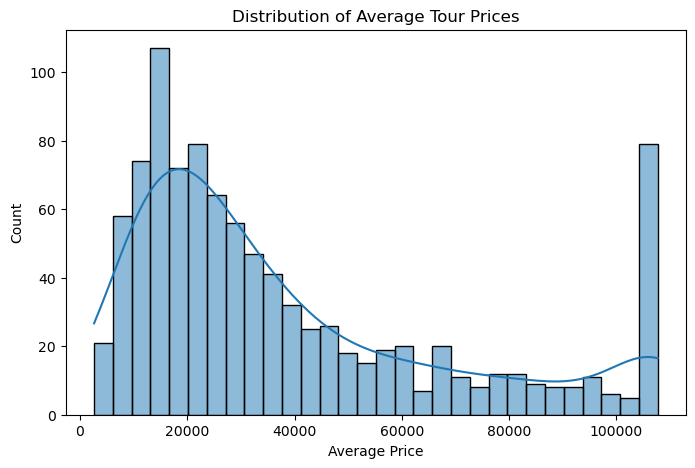

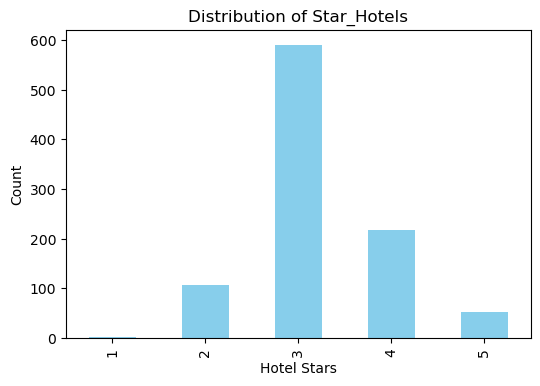

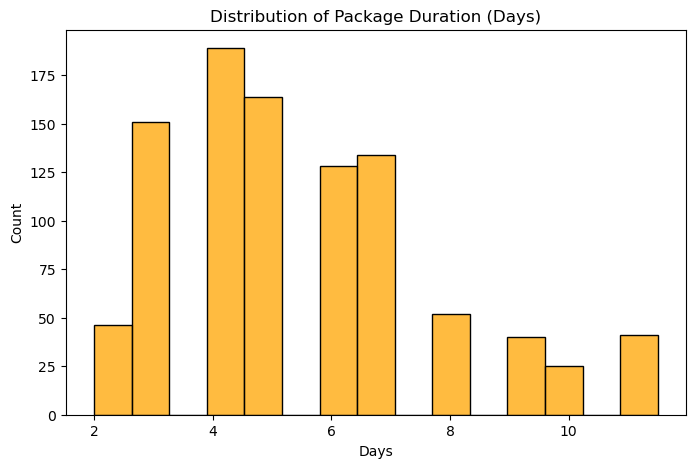

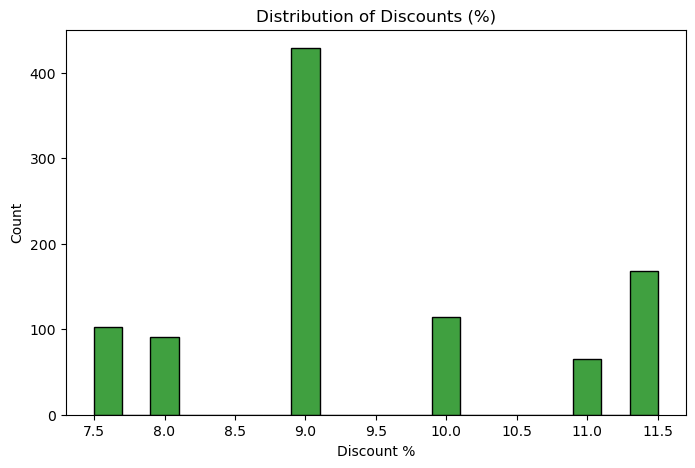

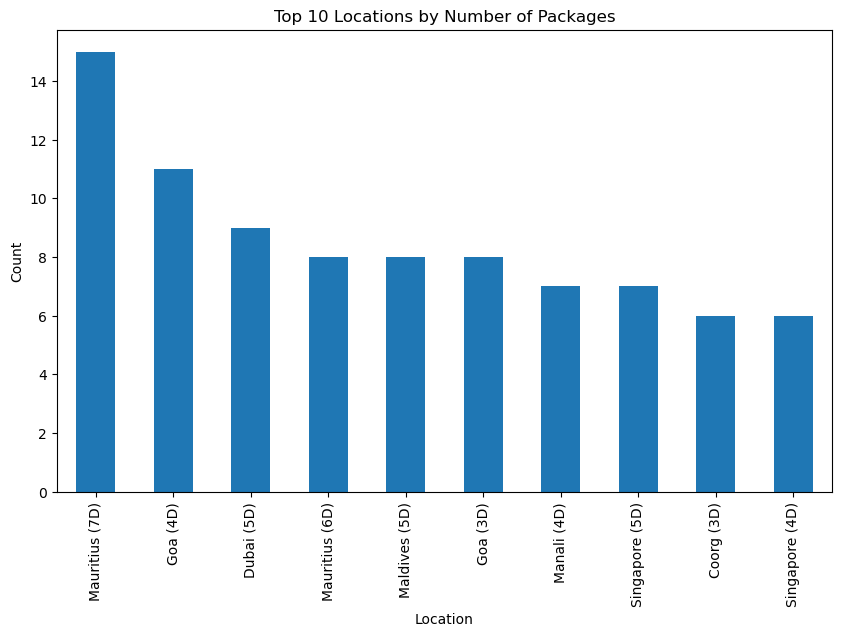

In [299]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Price'], bins=30, kde=True)
plt.title("Distribution of Average Tour Prices")
plt.xlabel("Average Price")
plt.show()

# Hotel Type Distribution
plt.figure(figsize=(6,4))
df['Hotel_Stars'].value_counts().sort_index().plot(kind='bar', color="skyblue")
plt.title("Distribution of Star_Hotels")
plt.xlabel("Hotel Stars")
plt.ylabel("Count")
plt.show()

# Days Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Days'], bins=15, color="orange")
plt.title("Distribution of Package Duration (Days)")
plt.xlabel("Days")
plt.show()

# Discounts Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Discount'], bins=20, color="green")
plt.title("Distribution of Discounts (%)")
plt.xlabel("Discount %")
plt.show()

# Top 10 Locations
plt.figure(figsize=(10,6))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Locations by Number of Packages")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


# BIVARIATE ANALYSIS

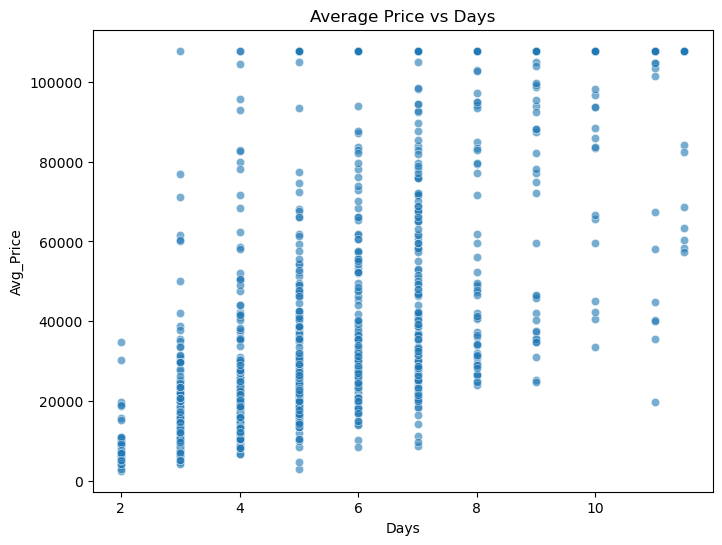

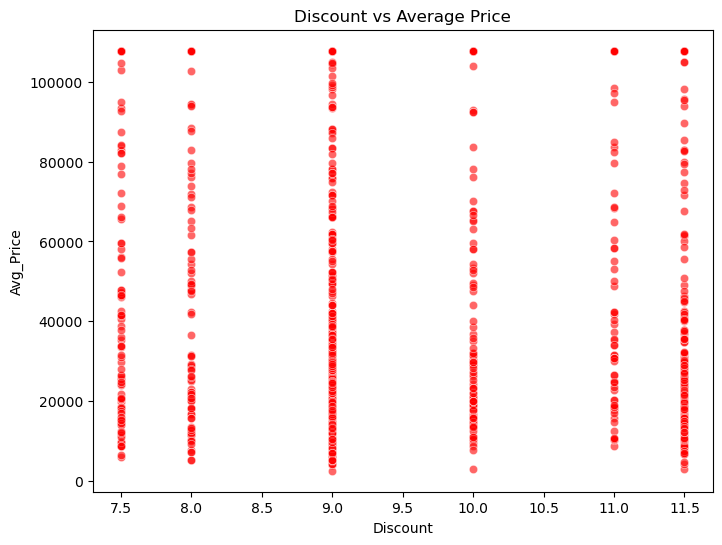

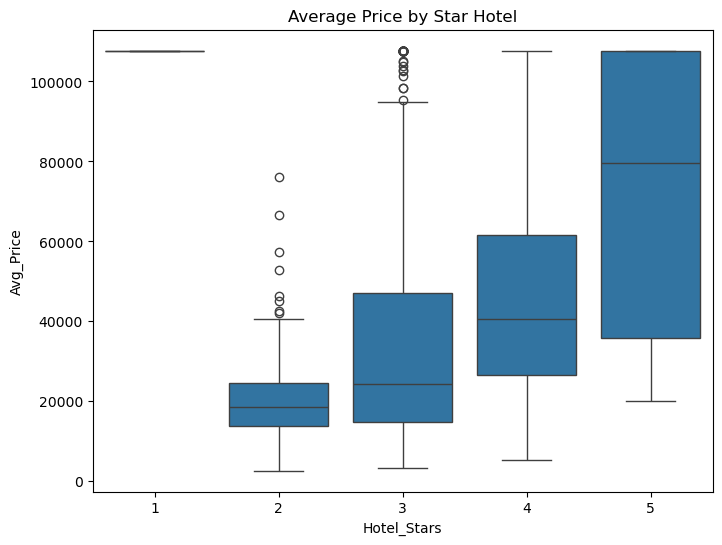

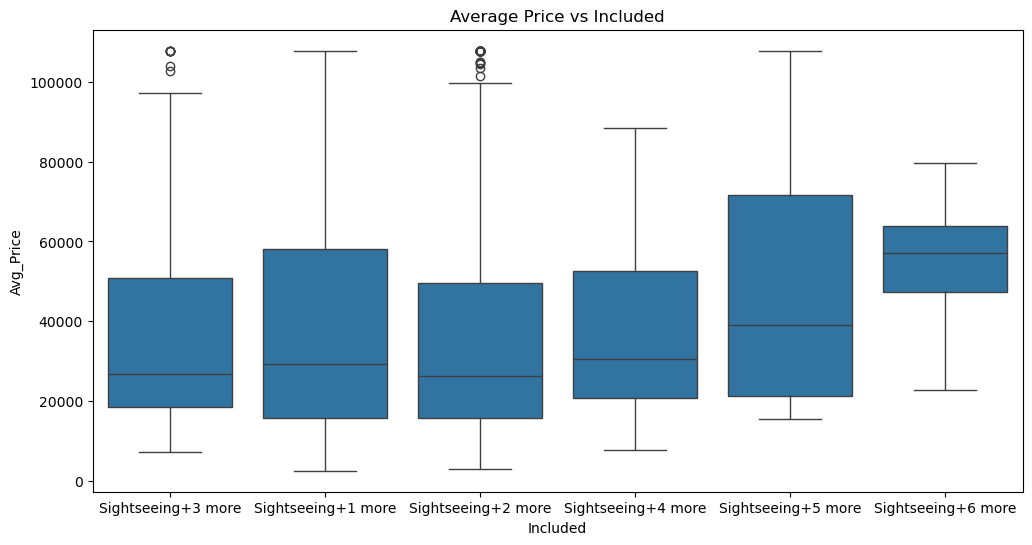

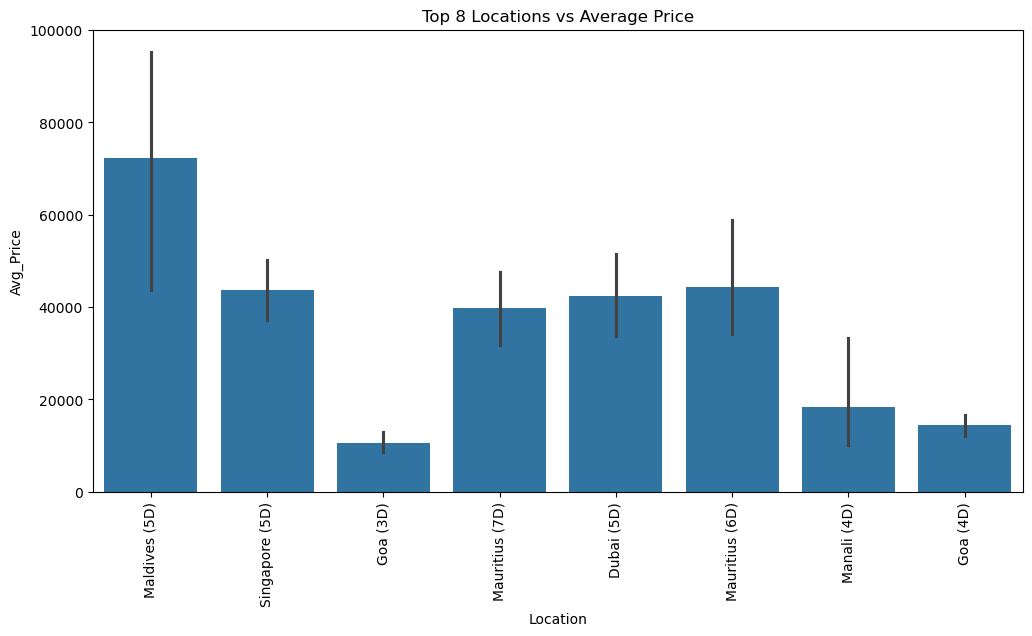

In [301]:

# Price vs Days
plt.figure(figsize=(8,6))
sns.scatterplot(x='Days', y='Avg_Price', data=df, alpha=0.6)
plt.title("Average Price vs Days")
plt.show()

# Discount vs Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Avg_Price', data=df, alpha=0.6, color="red")
plt.title("Discount vs Average Price")
plt.show()

# Hotel Stars vs Price
plt.figure(figsize=(8,6))
sns.boxplot(x='Hotel_Stars', y='Avg_Price', data=df)
plt.title("Average Price by Star Hotel")
plt.show()

# Sightseeing vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Included', y='Avg_Price', data=df)
plt.title("Average Price vs Included")
plt.show()

# Top Locations vs Price
plt.figure(figsize=(12,6))
top_locs = df['Location'].value_counts().head(8).index
sns.barplot(x='Location', y='Avg_Price', data=df[df['Location'].isin(top_locs)])
plt.xticks(rotation=90)
plt.title("Top 8 Locations vs Average Price")
plt.show()


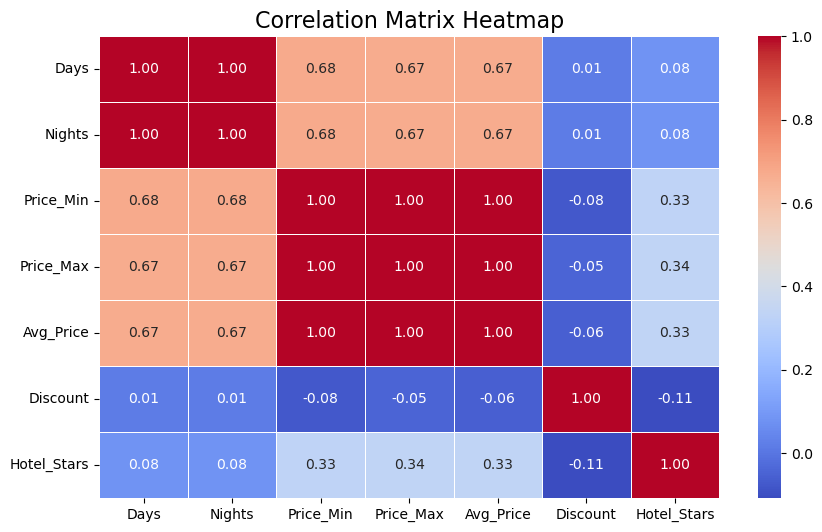

In [302]:
numeric_df = df.select_dtypes(include=['int64','int32',  'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [303]:
df.to_csv("Tour_packages using webscraping.csv", index=False)